In [1]:
######    CH2. 단순선형회귀분석 접근    ######
### 회귀문제 정의

import numpy as np

In [2]:
## 1열, 1행으로 구성된 행렬

vector = np.array([1,2,3,4,5])   # array는 기본적으로 열벡터를 생성
vector

array([1, 2, 3, 4, 5])

In [3]:
row_vector = vector.reshape((5,1))            # 행벡터 생성 - reshape(행,열)
column_vextor = vector.reshape((1,5))         # 열벡터 생성
single_feature_matrix = vector.reshape((1,5))

In [4]:
single_feature_matrix

array([[1, 2, 3, 4, 5]])

In [5]:
## 행렬의 크기가 n*p인 데이터 행렬
# 3행 5열의 행렬 형태(1) - array함수를 사용해 리스트 안에 리스트 변환

multiple_feature_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15]
])
multiple_feature_matrix       # 원소처럼 보이는 리스트 각각은 행이 된다              


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [6]:
# 3행 5열의 행렬 형태(2) - 벡터 생성 후 reshape메소드로 원하는대로 행렬 구성

vector = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
multiple_feature_matrix = vector.reshape((3, 5))     # 배열을 3행 5열로 구성
multiple_feature_matrix                

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [7]:
all_zeros = np.zeros((5, 3))     # 5행 3열의 0행렬
all_zeros

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [8]:
all_ones = np.ones((5, 3))       # 5행 3열의 1행렬
all_ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [9]:
## 단일 예측변수인 경우 결과변수(=응답변수) y는 벡터 형태
y = np.array([1,2,3,4,5]).reshape(5, 1)
y

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [3]:
## boston 부동산 관련 데이터
from sklearn.datasets import fetch_openml

boston= fetch_openml(name="boston", version=1, parser='auto')
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [16]:
## 밀접한 지역에 사는 특정 사람 그룹에 대한 통계 데이터
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [17]:
### 기초부터 시작

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 

In [20]:
%matplotlib inline       ## 그래픽 및 시각화를 쉽게 사용할 수 있는 명령어

UsageError: unrecognized arguments: ## 그래픽 및 시각화를 쉽게 사용할 수 있는 명령어


In [21]:
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [22]:
## 필요한 변수 선택을 위한 boston 데이터의 dataframe 변환

dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [23]:
## 정규분포 그리기

import math
import scipy

In [25]:
x = np.linspace(-4, 4, 100)   # -4~4까지 구간을 100개 균등 간격으로 나눈 배열을 생성하는 코드
x

array([-4.        , -3.91919192, -3.83838384, -3.75757576, -3.67676768,
       -3.5959596 , -3.51515152, -3.43434343, -3.35353535, -3.27272727,
       -3.19191919, -3.11111111, -3.03030303, -2.94949495, -2.86868687,
       -2.78787879, -2.70707071, -2.62626263, -2.54545455, -2.46464646,
       -2.38383838, -2.3030303 , -2.22222222, -2.14141414, -2.06060606,
       -1.97979798, -1.8989899 , -1.81818182, -1.73737374, -1.65656566,
       -1.57575758, -1.49494949, -1.41414141, -1.33333333, -1.25252525,
       -1.17171717, -1.09090909, -1.01010101, -0.92929293, -0.84848485,
       -0.76767677, -0.68686869, -0.60606061, -0.52525253, -0.44444444,
       -0.36363636, -0.28282828, -0.2020202 , -0.12121212, -0.04040404,
        0.04040404,  0.12121212,  0.2020202 ,  0.28282828,  0.36363636,
        0.44444444,  0.52525253,  0.60606061,  0.68686869,  0.76767677,
        0.84848485,  0.92929293,  1.01010101,  1.09090909,  1.17171717,
        1.25252525,  1.33333333,  1.41414141,  1.49494949,  1.57

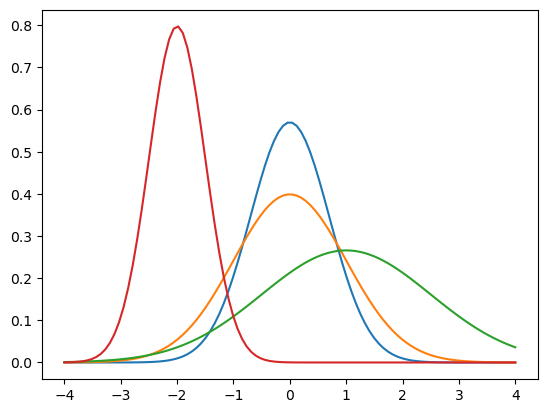

In [26]:
for mean, variance in [(0, 0.7), (0, 1), (1, 1.5), (-2, 0.5)]:
    plt.plot(x, scipy.stats.norm.pdf(x, mean, variance))
plt.show()

In [27]:
### 보스턴 506개 구역의 평균값 계산
mean_expected_value = dataset['target'].mean()    #1
mean_expected_value

22.532806324110677

In [28]:
np.mean(dataset['target'])                        #2

22.532806324110677

In [29]:
### SSE(오차제곱합) 계산 - 예측값과 실제값 사이의 오차 측정

squared_errors = pd.Series(mean_expected_value - dataset['target'])**2  # 잔차 제곱
squared_errors

0        2.152657
1        0.870128
2      148.040602
3      118.095898
4      186.792183
          ...    
501      0.017638
502      3.735740
503      1.869219
504      0.283883
505    113.056570
Name: target, Length: 506, dtype: float64

In [30]:
sse = np.sum(squared_errors)    # SERIES로 나열된 잔차제곱들을 모두 더하기
sse

42716.29541501977

In [31]:
print('Sum of Squared Errors (SSE): %01.f' % sse)   # SSE - 오차(잔차)제곱합 계산

Sum of Squared Errors (SSE): 42716


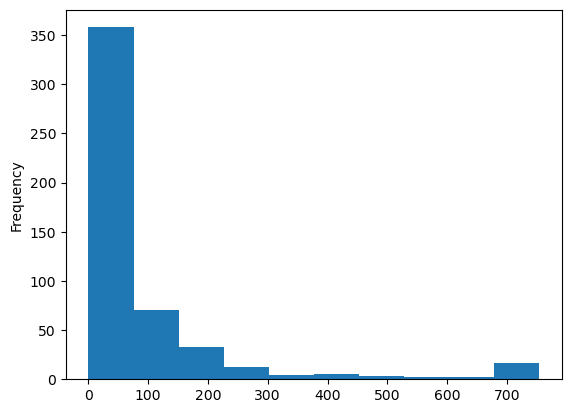

In [32]:
density_plot = squared_errors.plot(kind='hist')
plt.show()          # 오차 분포 시각화 - 오차가 0 주의에 높은 밀도로 분포하므로 데이터 분포가 괜찮은 분포라 할 수 있음

In [33]:
## 목표에 따라 변하는 변수를 측정 및 상수 값을 기반으로 초기 공식 확립
## 상관관계 고려 1단계 - 변수 표준화(평균 0, 표준편차(분산) 1)

In [34]:
def standardize(x):
    return (x - np.mean(x)/np.std(x))     ## 표준화 함수 작성

In [36]:
## 상관관계 고려 2단계 - 표준화 이후 공분산 비교 - 상관관계 범위: -1 ~ 1
def covariance(var1, var2, bias=0):
    observations = float(len(var1))
    return np.sum((var1 - np.mean(var1)) * (var2 - np.mean(var2))) / (observations - min(bias, 1))

def correlation(var1, var2, bias=0):
    return covariance(standardize(var1), standardize(var2), bias) / (np.std(var1) * np.std(var2))

In [37]:
## 피어슨 상관관계 공식
from scipy.stats.stats import pearsonr

C:\Users\a\AppData\Local\Temp\ipykernel_24124\4005289447.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [38]:
print("Our correlation estimation: %0.5f" % (correlation(dataset['RM'], dataset['target'])))

Our correlation estimation: 0.69536


In [40]:
print("Correlation from Scipy pearsonr estimation: %0.5f" % (pearsonr(dataset['RM'], dataset['target'])[0]))

Correlation from Scipy pearsonr estimation: 0.69536


In [41]:
## 목표변수(target)의 값과 그 지역 주택의 평균 방의 개수(RM) 사이의 관계에 대한 상관관계 0.695
## 긍정적이며 강한 상관관계 

In [42]:
## 산포도를 사용한 상관관계 시각화
x_range = [dataset['RM'].min(), dataset['RM'].max()]
x_mean = dataset['RM'].mean()
x_range, x_mean

([3.561, 8.78], 6.284634387351779)

In [43]:
y_range = [dataset['target'].min(), dataset['target'].max()]
y_mean = dataset['target'].mean()
y_range, y_mean

([5.0, 50.0], 22.532806324110677)

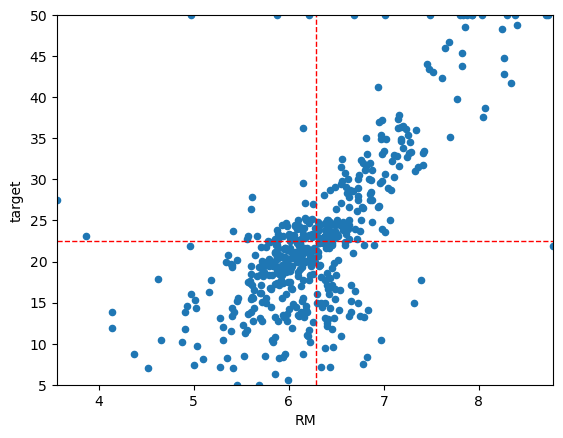

In [44]:
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanX = scatter_plot.plot([x_mean, x_mean], y_range, '--', color='red', linewidth=1)  # 수직선 그리기(X평균)
meanY = scatter_plot.plot(x_range, [y_mean, y_mean], '--', color='red', linewidth=1)  # 수평선 그리기(Y평균)
plt.show()

In [45]:
## 산포도를 보면, 점들이 제 1사분면과 제 3사분면에 몰려 있고, 양의 선형관계를 나타낸다는 것을 쉽게 알 수 있음

In [47]:
### 선형회귀 확장

## statsmodels.api - 별개의 예측변수 및 응답변수와 함께 작동 & 절편을 추가하는 등 예측변수의 변수 변환을 해야함
## 해당 교재에서는 이 모델로 선형회귀 예측에 사용
## 선형회귀 모델 호출
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [52]:
## xy 정의
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)   # 편향(상수항) 데이터 추가
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [49]:
## 여기서 수식은 y = px로 계산될 것이다. 
## 즉, 예측변수 X는 예측변수와 단위상수를 모두 포함하고, p는 계수의 벡터이다.

In [49]:
## 선형회귀 계산의 초기화 설정
linear_regression = sm.OLS(y, X)
linear_regression

In [50]:
## 회귀계수 p의 추정
fitted_model = linear_regression.fit()
fitted_model

In [51]:
fitted_model.summary() 
## 표1 - 모델 개요 & 모델 적합성 정도(R^2와 F값 확인) / 표2 - 계수 파악(coef와 std err 확인) / 표3 - 회귀 잔차 분석

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           2.49e-74
Time:                        16:12:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
fitted_model.params    # 추정 회귀계수(coef에 나와있음)

const   -34.670621
RM        9.102109
dtype: float64

In [54]:
betas = np.array(fitted_model.params)
betas

array([-34.67062078,   9.10210898])

In [55]:
fitted_values = fitted_model.predict(X)
fitted_values           # 데이터별 예측값 계산

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [56]:
## R-Squared 계산(R^2은 제곱오차에 따라 좌우 / 높을수록 좋음 / 단순선형회귀 한정)
mean_sum_squared_errors = np.sum((dataset['target'] - dataset['target'].mean())**2)
regr_sum_squared_errors = np.sum((dataset['target'] - fitted_values)**2)
(mean_sum_squared_errors - regr_sum_squared_errors) / mean_sum_squared_errors

0.4835254559913342

In [57]:
(pearsonr(dataset['RM'], dataset['target'])[0])**2

0.4835254559913339

In [60]:
## RM의 회귀계수는 9.102109, 상수항은 -34.670621이다.
## 추정 회귀식: y = 9.102109 * x(rm) -34.670621

In [61]:
9.1021 * 4.55 - 34.6706        # x(rm) = 4.55

6.743955

In [62]:
9.1021 * 5.55 - 34.6706         # x(rm) = 5.55

15.846055

In [63]:
(np.min(dataset['RM']), np.max(dataset['RM']))

(3.561, 8.78)

In [64]:
## 선형회귀는 학습된 값 즉, 매핑된 x의 최소-최대값 범위 사이에서만 정확한 예측값을 제공할 수 있다.

In [65]:
## 표준오차(std err) / p(베타) = 0.5 이상이면 모델이 정확한 계수 추정치를 제공했다는 것을 신뢰할 수 없음

In [66]:
## 잔차분석 고려사항
## 1) 평균으로부터 너무 멀리 떨어진 값(큰 표준화된 잔차) 주의
## 2) 예측변숫값에 대한 다른 분산 주의 - 선형회귀가 예측변수에 대해 조건부 평균인 경우 역방향 분산은 예측변수가 특정한 값을 가질 때 회귀가 적절하게 작동하지 않음
## 3) 잔차 분포 모양이 이상한지 주의 - 더 복잡한 모델이 필요할 수 있음

In [67]:
def standardize(x):
    return (x - np.mean(x)) /np.std(x)     # X 표준화

In [68]:
residuals = dataset['target'] - fitted_values
normalized_residuals = standardize(residuals)
normalized_residuals                      # 잔차 표준화(응답변수(실제값) - 적합값(예측값))

0     -0.178060
1     -0.329244
2      0.601533
3      0.662428
4      0.881082
         ...   
501   -0.445184
502   -0.065770
503   -0.745970
504   -0.782834
505   -1.259277
Length: 506, dtype: float64

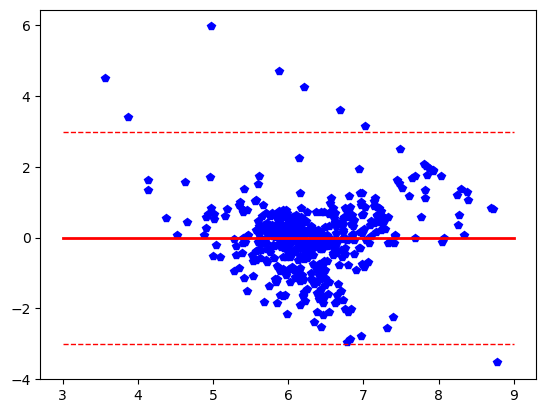

In [71]:
## 잔차 시각화

# 표준화 잔차 산점도
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals, 'bp')

# 평균 잔차 선(실선 형태)
x_range = [dataset['RM'].min(), dataset['RM'].max()]
mean_residual = plt.plot(
    [int(x_range[0]), round(x_range[1], 0)],
    [0, 0],
    '-',
    color='red',
    linewidth=2
)

# 상한선
upper_bound = plt.plot(
    [int(x_range[0]), round(x_range[1], 0)],
    [3, 3],
    '--',
    color='red',
    linewidth=1
)

# 하한선
lower_bound = plt.plot(
    [int(x_range[0]), round(x_range[1], 0)],
    [-3, -3],
    '--',
    color='red',
    linewidth=1
)

In [78]:
## 해당 산포도를 보면 잔차가 문제점을 지니고 있음을 알 수 있다(선형회귀모델 성능 저하 요인)
## 1) 상,하한선 범위 이외에 몇 개의 점이 존재
## 2) 점 구름의 형태를 파악 필요, 직접적 인과관계가 아닐 경우에는 추정치가 안 좋아질 확률 높음

In [ ]:
## 회귀모델을 이용한 예측

In [73]:
## 1) 새로운 경우를 포함하는 배열 제공 - 단일 신규 사례를 나타내는 xp변수 생성
RM = 5
Xp = np.array([1, RM])
print("Our model predicts if RM = %01.f the answer value is %0.1f" % (RM, fitted_model.predict(Xp)))

Our model predicts if RM = 5 the answer value is 10.8


C:\Users\a\AppData\Local\Temp\ipykernel_24124\1307901415.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Our model predicts if RM = %01.f the answer value is %0.1f" % (RM, fitted_model.predict(Xp)))


In [74]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
x_range

[3.561, 8.78]

In [75]:
y_range = [dataset['target'].min(), dataset['target'].max()]
y_range

[5.0, 50.0]

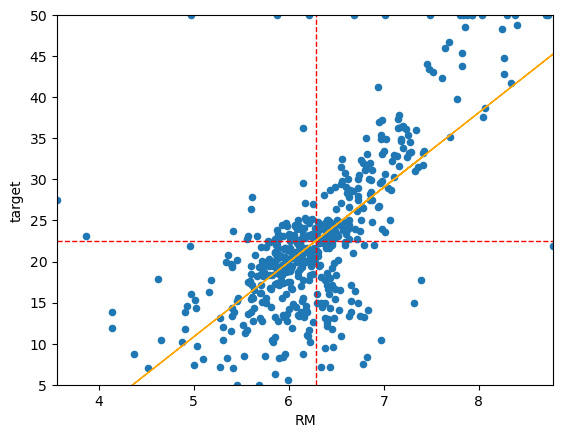

In [76]:
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', 
                           xlim=x_range, ylim=y_range)
# y축 평균값 선
meanY = scatter_plot.plot(x_range,
                        [dataset['target'].mean(), dataset['target'].mean()],
                        '--', color='red', linewidth=1)
# x축 평균값 선
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()],
                          y_range,
                          '--', color='red', linewidth=1)
# 회귀선 - 정확하게 x와 y의 평균의 교차점을 통과
regression_line = scatter_plot.plot(dataset['RM'], 
                                    fitted_values, 
                                    '-', color='orange', linewidth=1)

In [77]:
## 2) numpy에서 dot 함수 사용하여 예측
## 변수 데이터와 편향(1열), 계수 벡터를 모두 포함한 x벡터 생성
## 행렬 * 벡터 = 관찰 개수와 동일한 길이의 벡터 결과

predictions_by_dot_product = np.dot(X, betas)
print("Using the prediction method: %s" % fitted_values[:10])
print("Using betas and a dot product: %s" % predictions_by_dot_product[:10])

Using the prediction method: 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64
Using betas and a dot product: [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [81]:
## Scikit-learn을 사용한 회귀(normalize=False 옵션 제거) - 모델에 편향 필수 지정

from sklearn import linear_model
linear_regression = linear_model.LinearRegression(fit_intercept=True)   
linear_regression

LinearRegression()

In [82]:
## 데이터 준비에서 관찰개수 계산 및 예측 변수를 2차원 배열로 준비해야 함
## 벡터 사용 시 오류 발생
observations = len(dataset)
observations

506

In [83]:
X = dataset['RM'].values.reshape((observations, 1))   # x는 무조건 벡터가 아닌 행렬
y = dataset['target'].values   # y는 벡터 가능

In [84]:
linear_regression.fit(X, y)   # 모델 적함

LinearRegression()

In [85]:
# 계수 벡터 및 편향 상수 체크
print(linear_regression.coef_)
print(linear_regression.intercept_)

[9.10210898]
-34.67062077643857


In [86]:
# predict를 사용한 결과의 첫 10개 원소들의 예측값 출력
print(linear_regression.predict(X)[:10])

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155]


In [87]:
# 이전처럼 행렬 * 벡터로 스스로 결과 계산 가능
Xp = np.column_stack((X, np.ones(observations)))
Xp

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [88]:
v_coef = list(linear_regression.coef_) + [linear_regression.intercept_]
v_coef

[9.10210898118031, -34.67062077643857]

In [89]:
np.dot(Xp, v_coef)[:10]

array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155])

In [90]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples=10000000, n_features=1, n_targets=1, random_state=1-1)

In [92]:
%%time
sk_linear_regression = linear_model.LinearRegression(fit_intercept=True)
sk_linear_regression.fit(HX, Hy)

CPU times: total: 531 ms
Wall time: 569 ms


LinearRegression()

In [93]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: total: 1.47 s
Wall time: 1.8 s


In [94]:
## statsmodel의 기본 알고리즘은 Scikit-learn에 비해 3배 가량 느리다

In [1]:
### 비용 함수 최소화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
import math
import scipy
from scipy.stats.stats import pearsonr

import sys
sys.path.append("../")

%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\a\AppData\Local\Temp\ipykernel_9544\2484332192.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [4]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
## 제곱오차를 사용하는 이유
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [6]:
def squared_cost(v, e):
    return np.sum((v - e) ** 2)

In [7]:
from scipy.optimize import fmin  # 하나의 벡터(x)값에 대하여 최소제곱 합계를 만드는 값 계산

In [8]:
xopt = fmin(squared_cost, x0=0, xtol=1e-8, args=(x,))
xopt                             # fmin(최적화 함수, 초기추정, 최적화 수렴 기준,함수에 추가적으로 전달할 인자)

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


array([7.8])

In [9]:
print('The result of optmization is %0.1f' % xopt[0])
print('The mean is %0.1f' % (np.mean(x)))   # 최상의 e값을 출력, 실제로 x 평균인지 확인

The result of optmization is 7.8
The mean is 7.8


In [10]:
def absolute_cost(v, e):
    return np.sum(np.abs(v - e))            # 절대 오차 최소화 과정

In [11]:
xopt = fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))
xopt

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


array([8.])

In [12]:
print('The result of optmization is %0.1f' % xopt[0])
print('The medain is %0.1f' % (np.median(x)))
## 해당 코드로는 절대 오차를 최소화하는 것은 중앙값이라는 것을 알 수 있다.

The result of optmization is 8.0
The medain is 8.0


In [ ]:
## 본 파트는 단순선형회귀에서 제곱오차를 왜 사용 가능한지를 보여주는 파트라고 할 수 있다.
## 제곱오차를 최소화한다면 회귀분석에서 평균, 또는 중앙값을 사용하는 것이 가능하다.

In [13]:
## 방법 1) 의사 역행렬 및 기타 최적화 방법
observations = len(dataset)
observations

506

In [14]:
## np,linalg.solve - 역행렬 및 정규 방정식 이용하여 계산

X = dataset['RM'].values.reshape((observations, 1))       # X는 벡터가 아닌 행렬이어야 함
Xb = np.column_stack((X, np.ones(observations)))          
y = dataset['target'].values                              # Y는 벡터일 수 있음

In [15]:
# pseudo = T - 유사 역행렬 / F - 정규 역행렬 
def matrix_inverse(X, y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))   # dot - x의 전치행렬 * x / pinv - 역행렬
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
# 정규 방정식 사용
def normal_equations(X, y):
    return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))      # np.linalg.solve - 선형 시스템 계산

print(matrix_inverse(Xb, y))
print(matrix_inverse(Xb, y, pseudo=True))
print(normal_equations(Xb, y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


In [16]:
## 방법 2) 작업에서의 기울기 하강
observations = len(dataset)
X = dataset['RM'].values.reshape((observations, 1))  # x는 행렬이어야 하며, 벡터는 될 수 없다
X = np.column_stack((X, np.ones(observations)))      # 편향 추가
y = dataset['target'].values                         # y는 벡터일 수 있다

In [17]:
## 응답변수(y)를 정의한 후 예측변수(x(rm) - 주택당 방의 평균 개수)를 선택하고 편향(= 상수 1)을 더하기
## 최적화 과정에 사용되는 모든 함수를 정의
import random

In [18]:
def random_w(n):
    """normal distribtion에 해당하는 n개의 값을 return 한다."""
    return np.array([np.random.normal() for j in range(n)])   # N(0,1)인 정규분포에서 n개의 난수 생성 후 numpy 배열 형성

In [19]:
def hypothesis(X, w):
    return np.dot(X, w)       # 독립변수 행렬(2차원 행렬) * 회귀 계수 벡터 = 예측값 계산

In [20]:
def loss(X, w, y):
    return hypothesis(X, w) - y   # 예측값 - 실제값 = 잔차 계산

In [21]:
def squared_loss(X, w, y):
    return loss(X, w, y) ** 2     # 잔차제곱 = 제곱 오차 계산

In [22]:
def gradient(X, w, y):
    gradients = list()
    n = float(len(y))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X, w, y) * X[:,j]) / n)    # MSE(제곱 오차 평균) 계산
    return gradients   # J번째 특성에 대한 그라디언트로 구성된 리스트

In [23]:
def update(X, w, y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X, w, y))]   # 각 회귀계수를 업데이트한 새로운 벡터

In [28]:
## 기울기 하강법 수행
def optimize(X, y, alpha=0.01, eta=10**-12, iterations=1000):   # eta - 수렴 기준/iterations=1000 - 최적화 최대 반복 횟수
    w = random_w(X.shape[1])                                    # 무작위 초기화 - 가중치 벡터 w 생성
    print(w)
    path = list()                                               # 함수 값의 변화를 기록할 리스트 초기화
    for k in range(iterations):              
        SSL = np.sum(squared_loss(X, w, y))                     # 현재 가중치 w로 계산된 loss함수의 합계
        new_w = update(X, w, y, alpha=alpha)                    # 가중치 w 업데이트
        new_SSL = np.sum(squared_loss(X, new_w, y))             # 새로운 가중치 w로 계산된 loss함수의 합계
        w = new_w                                               # 가중치 변경
        
        ## path 에 추가
        if k >= 5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta): # loss함수 변화가 eta이하로 줄어들면 최적화 수렴
            path.append(new_SSL)                                # 현재 loss함수값을 path리스트에 추가
            return w, path
        if k % (iterations / 20) == 0:                          # 반복 횟수가 총 반복 횟수의 5%일 경우
            path.append(new_SSL)                                               
    return w, path                                              # 현재 loss함수값을 path리스트에 추가하여 변화 과정 기록

In [32]:
## 기울기 하강이 작동하는 데 필요한 함수를 정의했으니, 단일 회귀 문제에 대하여 최적화 진행
alpha = 0.048
w, path = optimize(X, y, alpha, eta=10**-12, iterations=25000)
print("These are our final coefficents: %s" % w)   # 최적화 완료 후 최종 회귀 계수
print("Obtained walking on this path of squared loss %s" % path)  # 최적화 과정에서 loss함수 값의 변화 출력 / 최적화의 수렴 상태 및 경과 확인

[0.04941605 0.94854981]
These are our final coefficents: [9.102103522671198, -34.67058605421794]
Obtained walking on this path of squared loss [255779.88816695398, 23983.563216888007, 22515.702116859742, 22169.053550106335, 22087.189381330507, 22067.856423481797, 22063.290772052504, 22062.212552509634, 22061.95792129203, 22061.897787845726, 22061.883586792934, 22061.88023308692, 22061.87944107916, 22061.879254039424, 22061.87920986831, 22061.87919943691, 22061.879196973438, 22061.879196391663, 22061.879196254275, 22061.879196221827, 22061.87919621932]


In [30]:
X.shape

(506, 2)

In [31]:
X[:, 1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
# scikit-learn의 linear_regression은 실제로 기울기 하강에 의해 구동 & 빅데이터 분석에서 선호